In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('/content/car_ad.csv', sep=',',encoding='latin-1')
df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


# Exploration

In [3]:
df.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


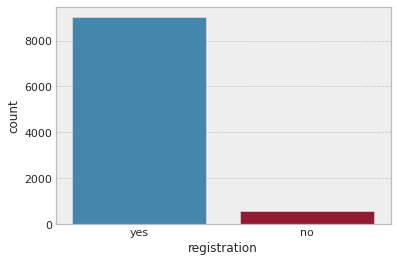

In [4]:
style.use('bmh')
sns.countplot(df.registration)

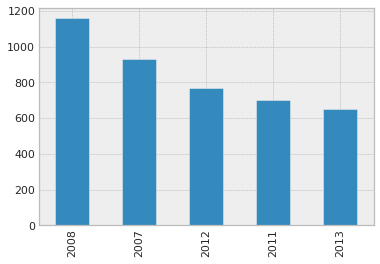

In [5]:
df.year.value_counts().head().plot(kind='bar')

In [6]:
df.drop(['body','engType','registration', 'model', 'drive'], axis=1, inplace=True)

## Filtering Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'Year')

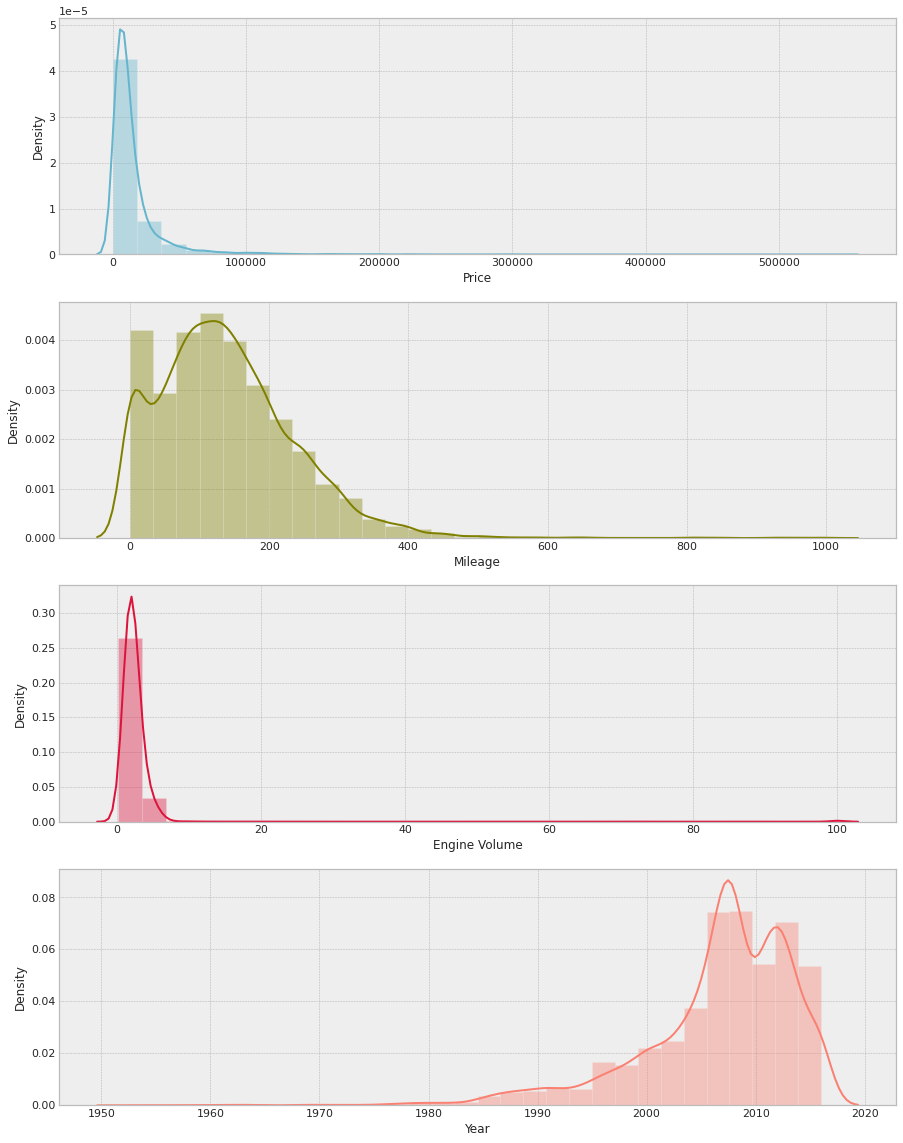

In [7]:
style.use('bmh')

f = plt.figure(figsize=[15,20])

bins = 30

ax = f.add_subplot(4,1,1)
sns.distplot(df['price'], color='c', bins=bins)
plt.xlabel('Price')

ax = f.add_subplot(4,1,2)
sns.distplot(df['mileage'], color='olive', bins=bins)
plt.xlabel('Mileage')

ax = f.add_subplot(4,1,3)
sns.distplot(df['engV'], color='crimson', bins=bins)
plt.xlabel('Engine Volume')

ax = f.add_subplot(4,1,4)
sns.distplot(df['year'], color='salmon', bins=bins)
plt.xlabel('Year')

In [8]:
q = df['price'].quantile(0.99)
data_price = df[df['price'] < q]

In [9]:
q = data_price['mileage'].quantile(0.99)
data_mil = data_price[data_price['mileage'] < q]

In [10]:
data_eng = data_mil[data_mil['engV'] < 6.5]

In [11]:
q = data_eng['year'].quantile(0.01)
data = data_eng[data_eng['year'] > q]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 0, 'Year')

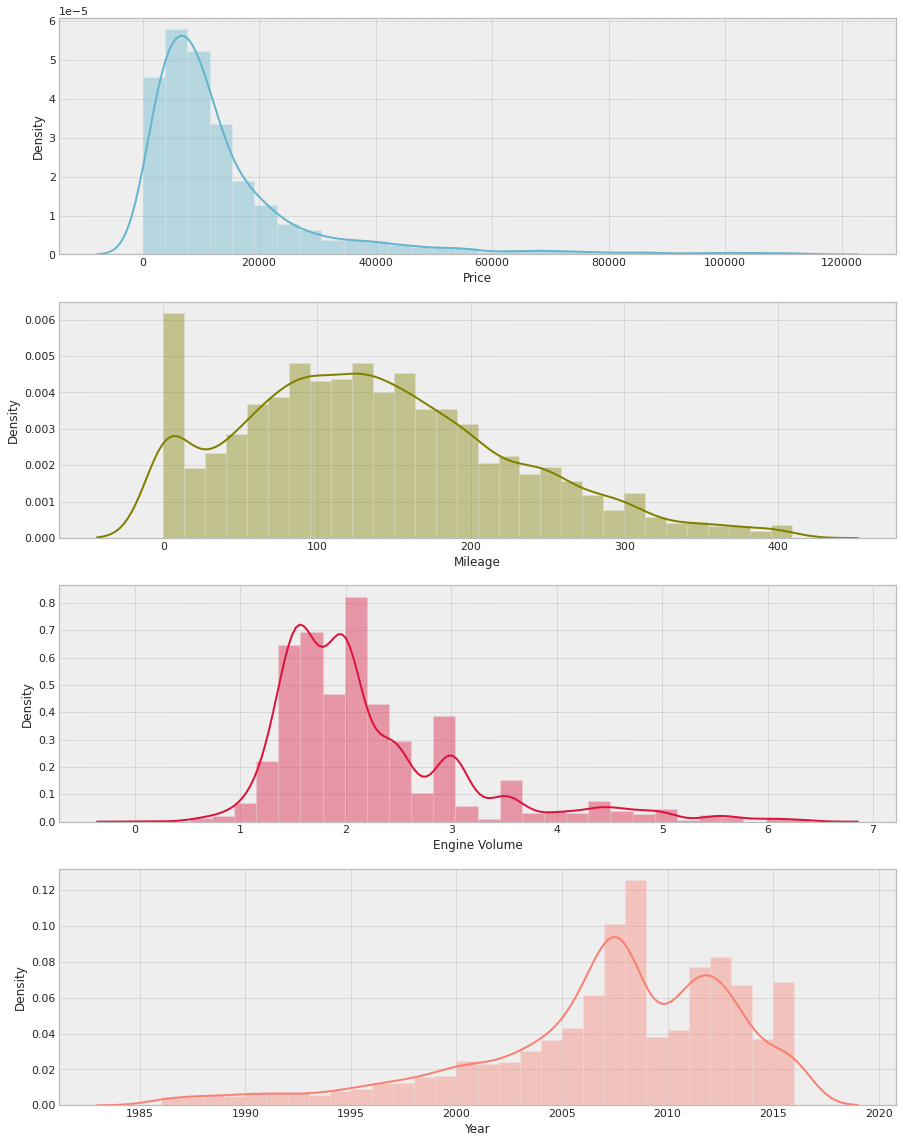

In [12]:
style.use('bmh')

f = plt.figure(figsize=[15,20])

bins = 30

ax = f.add_subplot(4,1,1)
sns.distplot(data['price'], color='c', bins=bins)
plt.xlabel('Price')

ax = f.add_subplot(4,1,2)
sns.distplot(data['mileage'], color='olive', bins=bins)
plt.xlabel('Mileage')

ax = f.add_subplot(4,1,3)
sns.distplot(data['engV'], color='crimson', bins=bins)
plt.xlabel('Engine Volume')

ax = f.add_subplot(4,1,4)
sns.distplot(data['year'], color='salmon', bins=bins)
plt.xlabel('Year')

In [13]:
data.describe(include='all')

,car,price,mileage,engV,year
count,8791,8791.000000,8791.000000,8791.000000,8791.000000
unique,81,NaN,NaN,NaN,NaN
top,Volkswagen,NaN,NaN,NaN,NaN
freq,878,NaN,NaN,NaN,NaN
mean,NaN,14277.464373,137.346718,2.222840,2006.966898
std,NaN,15999.906151,88.197682,0.936345,6.198530
min,NaN,0.000000,0.000000,0.100000,1986.000000
25%,NaN,5200.000000,73.000000,1.600000,2004.000000
50%,NaN,9300.000000,129.000000,2.000000,2008.000000
75%,NaN,16700.000000,193.000000,2.500000,2012.000000


# OLS Assumption

Text(0.5, 1.0, 'Year vs Price')

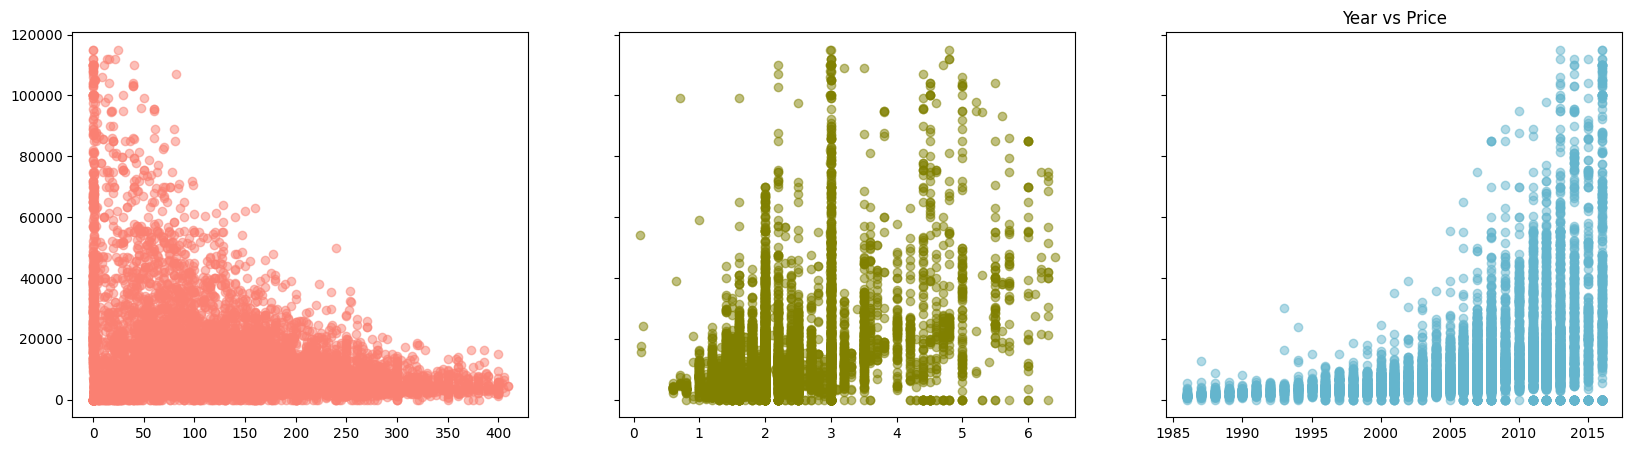

In [14]:
style.use('default')
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=[20,5])

ax1.scatter(data['mileage'], data['price'], color='salmon', alpha = 0.5)
plt.title('Mileage vs Price')

ax2.scatter(data['engV'], data['price'], color='olive', alpha = 0.5)
plt.title('engine Volume vs Price')

ax3.scatter(data['year'], data['price'], color='c', alpha = 0.5)
plt.title('Year vs Price')

## Log Transformation

In [15]:
log_price = np.log(data['price'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
data['log_price'] = log_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
data = data.drop(['price'], axis=1)

Text(0.5, 1.0, 'Year vs Log Price')

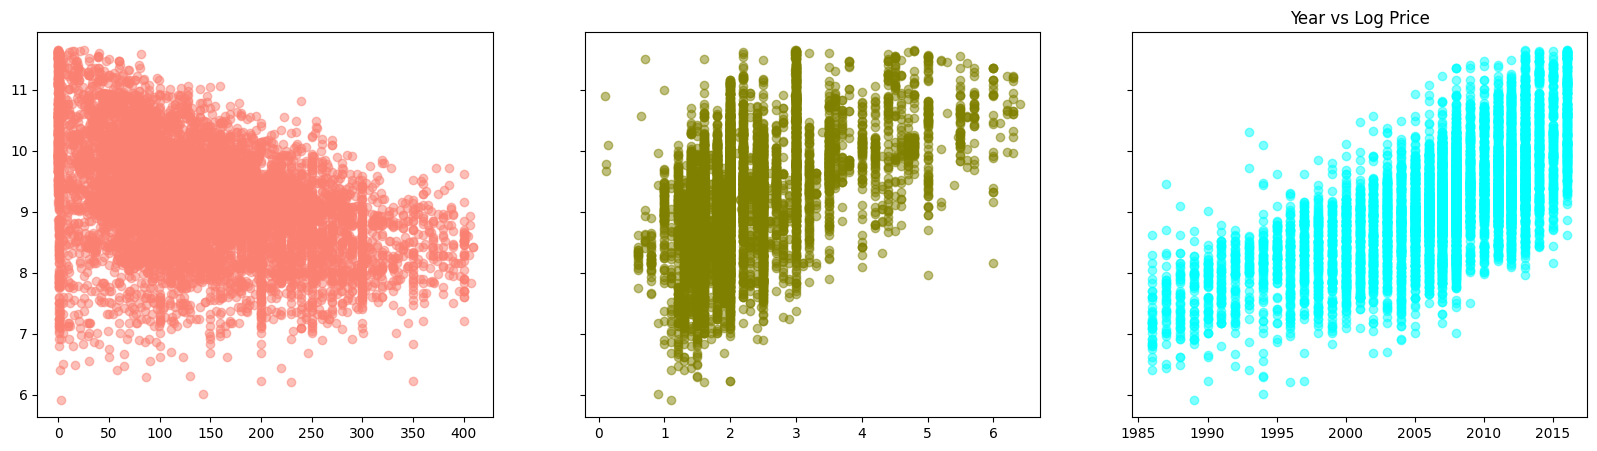

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=[20,5])

ax1.scatter(data['mileage'], data['log_price'], color='salmon', alpha = 0.5)
plt.title('Mileage vs Log Price')

ax2.scatter(data['engV'], data['log_price'], color='olive', alpha = 0.5)
plt.title('engine Volume vs Log Price')

ax3.scatter(data['year'], data['log_price'], color='cyan', alpha = 0.5)
plt.title('Year vs Log Price')

After applying log function, some data point result to infinity or negative infinity. If we continue to process the data in training, numpy can't handle it.

In [19]:
# removing infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna(subset = ['log_price'], axis = 0)

### Checking Multicollinearity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
vif_table = pd.DataFrame()
features = data[['year', 'mileage', 'engV']]

In [22]:
vif = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

In [23]:
vif_table['Feature'] = features.columns
vif_table['VIF'] = vif

In [24]:
vif_table

,Feature,VIF
0,year,8.689758
1,mileage,3.513262
2,engV,6.729700


In [25]:
VIF = pd.DataFrame(columns=['VIF','Standard'])
VIF['VIF'] =[
    'vif = 1',
    '1 > vif > 7',
    'vif < 7'
]
VIF['Standard'] = [
    'No Multicollinearity',
    'Perfectly Okay',
    'Not Okay'
]
VIF

,VIF,Standard
0,vif = 1,No Multicollinearity
1,1 > vif > 7,Perfectly Okay
2,vif < 7,Not Okay


Because year exceeds the standard collinearity, we will drop it

In [26]:
data = data.drop(['year'], axis=1)

### Creating Dummy Variable for Categorical Data

In [27]:
data = pd.get_dummies(data, drop_first=True)

In [28]:
data.head()

,mileage,engV,log_price,car_Alfa Romeo,car_Aro,car_Aston Martin,car_Audi,car_BMW,car_BYD,car_Bentley,...,car_Tesla,car_Toyota,car_UAZ,car_VAZ,car_Volkswagen,car_Volvo,car_Wartburg,car_ZAZ,car_ZX,car_ËUAZ
0,68,2.5,9.648595,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,1.8,9.928180,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,135,5.5,10.463103,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,162,1.8,9.786954,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,83,2.0,9.717158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression

In [29]:
X = data.drop(['log_price'], axis=1)
y = data['log_price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Price')

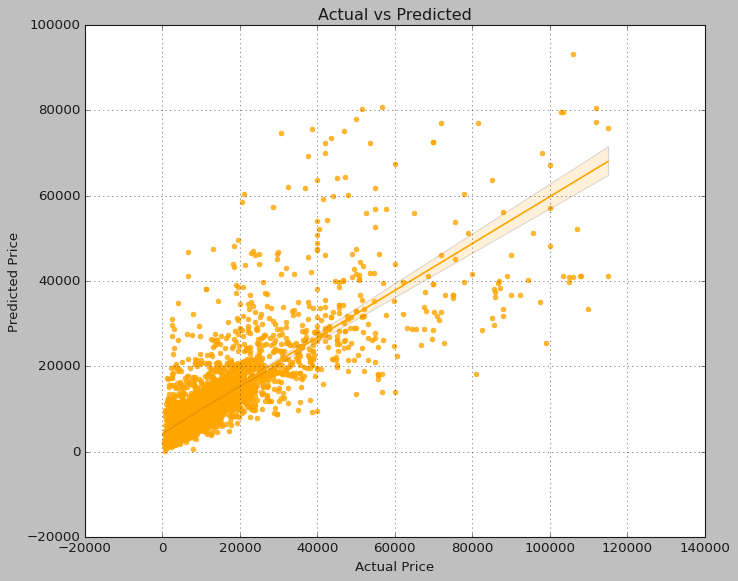

In [35]:
style.use('classic')
plt.figure(figsize=(10,8))
sns.regplot(np.exp(y_test), np.exp(y_pred), color='orange')
plt.grid()
plt.title('Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

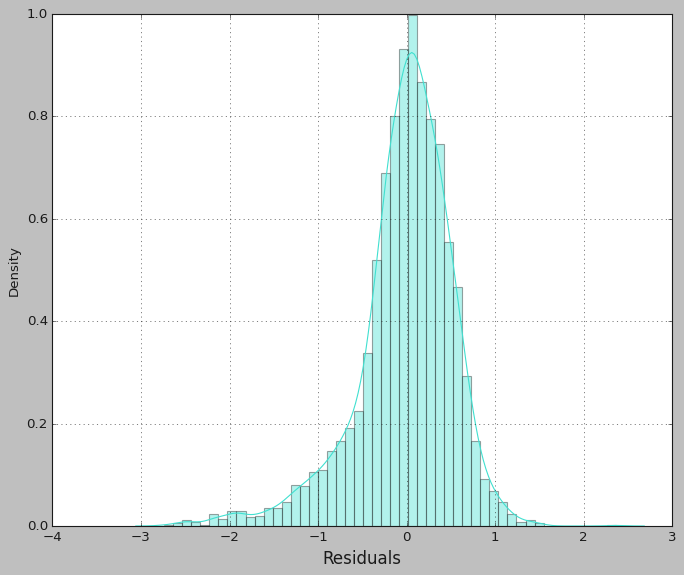

In [36]:
# Residual/Error
plt.figure(figsize=[10,8])
sns.distplot(y_test-y_pred, bins=50, color='turquoise')
plt.grid()
plt.xlabel("Residuals", fontsize=15)

# Evaluate Performance

In [37]:
from sklearn import metrics

In [38]:
print('R-score: ', lm.score(X_train, y_train))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-score:  0.6662597302560583
MAE:  0.39368929829290306
MSE:  0.2955873340595431
RMSE:  0.5436794405341654


# Weight Interpretation
<ul><b>I. Continuous Variable</b></ul>
       <li>1. A positive weight shows that as Feature increases in value, so do the 'log_price' and 'Price' respectively.</li>
       <li>2. A negative weight shows that as Feature increases in value, 'log_price' and 'Price' decreases respectively.</li>
   <ul></ul>
<ul><b>II. Dummy Variable </b></ul> 
       <li>1. A positive weight show that the respective category is expensive than benchmark.</li>

In [39]:
weights = pd.DataFrame(lm.coef_, X.columns,columns=['Weights'])
weights

,Weights
mileage,-5.299077e-03
engV,3.229117e-01
car_Alfa Romeo,-2.324344e-01
car_Aro,-1.227781e+00
car_Aston Martin,8.260059e-14
...,...
car_Volvo,2.863812e-01
car_Wartburg,0.000000e+00
car_ZAZ,-1.214187e+00
car_ZX,3.012037e-01


In [40]:
testing_data=pd.DataFrame({'actual price': np.exp(y_test),
                          'predicted price': np.exp(y_pred),
                          'residuals': np.abs(np.exp(y_test)-np.exp(y_pred))})

testing_data.head()

,actual price,predicted price,residuals
3964,24300.0,19800.969166,4499.030834
942,6699.0,7584.006606,885.006606
3444,5999.0,9952.405739,3953.405739
8638,1600.0,3778.169213,2178.169213
8347,11900.0,8022.855274,3877.144726
